In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_naples_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Naples')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/naples_{date}.csv',index=False)
get_listings_naples_timeseries()

In [4]:
# pull in detailed_listings
raw_df_naples = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_naples)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(naples_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 7142 AirBnb listings.


In [5]:
naples_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2020-12.csv')
naples_raw_df_12_12_2020.shape





(8084, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for naples
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_naples = glob.glob('naples/**.csv')
files_naples

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['naples/Naples_2021-01.csv',
 'naples/Naples_2021-03.csv',
 'naples/Naples_2021-02.csv',
 'naples/Naples_2021-06.csv',
 'naples/Naples_2021-07.csv',
 'naples/Naples_2021-04.csv',
 'naples/Naples_2021-10.csv',
 'naples/Naples_2020-12.csv',
 'naples/Naples_2021-09.csv',
 'naples/Naples_2021-08.csv']

In [7]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

naples_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(naples_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(naples_raw_df_12_12_2020['price'].mean(),2)}.")

naples_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(naples_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_1_9_2021['price'].mean(),2)}.")

naples_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(naples_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_2_8_2021['price'].mean(),2)}.")

naples_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(naples_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_3_4_2021['price'].mean(),2)}.")

naples_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(naples_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_4_9_2021['price'].mean(),2)}.")

#naples_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(naples_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_5_19_2021['price'].mean(),2)}.")

naples_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(naples_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_6_3_2021['price'].mean(),2)}.")

naples_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(naples_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_7_4_2021['price'].mean(),2)}.")

naples_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(naples_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_8_6_2021['price'].mean(),2)}.")

naples_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(naples_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_9_7_2021['price'].mean(),2)}.")

naples_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(naples_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_10_6_2021['price'].mean(),2)}.")

#naples_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/naples/naples_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(naples_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(naples_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 8084 AirBnb listings; the avg price is €78.08.
The 1_9_2021 dataset contains 8039 AirBnb listings; the avg price is €71.68.
The 2_8_2021 dataset contains 7997 AirBnb listings; the avg price is €72.29.
The 3_4_2021 dataset contains 8030 AirBnb listings; the avg price is €73.04.
The 4_9_2021 dataset contains 7961 AirBnb listings; the avg price is €74.74.
The 6_3_2021 dataset contains 7909 AirBnb listings; the avg price is €77.02.
The 7_4_2021 dataset contains 7957 AirBnb listings; the avg price is €84.45.
The 8_6_2021 dataset contains 7311 AirBnb listings; the avg price is €90.63.
The 9_7_2021 dataset contains 7202 AirBnb listings; the avg price is €83.77.
The 10_6_2021 dataset contains 7142 AirBnb listings; the avg price is €88.39.


In [8]:
df_list_naples = [naples_raw_df_12_12_2020, naples_raw_df_1_9_2021, naples_raw_df_2_8_2021,
           naples_raw_df_3_4_2021, naples_raw_df_4_9_2021, naples_raw_df_6_3_2021, naples_raw_df_7_4_2021,
           naples_raw_df_8_6_2021, naples_raw_df_9_7_2021, naples_raw_df_10_6_2021]

dates_naples = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_naples = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_naples = []

def airbnb_parse_naples(df_list, files):
    for file in files_naples:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/naples/naples_{file}.csv")
        print(f"The {file} naples dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_naples(df_list, dates):
    for file in files_naples:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/naples/naples_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_naples.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_naples)

naples_parse = airbnb_parse_naples(df_list_naples, files_naples)


The 2020-12 naples dataset contains 8084 AirBnb listings -- the avg price is €78.08.
The 2021-01 naples dataset contains 8039 AirBnb listings -- the avg price is €71.68.
The 2021-02 naples dataset contains 7997 AirBnb listings -- the avg price is €72.29.
The 2021-03 naples dataset contains 8030 AirBnb listings -- the avg price is €73.04.
The 2021-04 naples dataset contains 7961 AirBnb listings -- the avg price is €74.74.
The 2021-06 naples dataset contains 7909 AirBnb listings -- the avg price is €77.02.
The 2021-07 naples dataset contains 7957 AirBnb listings -- the avg price is €84.45.
The 2021-08 naples dataset contains 7311 AirBnb listings -- the avg price is €90.63.
The 2021-09 naples dataset contains 7202 AirBnb listings -- the avg price is €83.77.
The 2021-10 naples dataset contains 7142 AirBnb listings -- the avg price is €88.39.


In [9]:
naples_summary = airbnb_to_frame_naples(df_list_naples, files_naples)
naples_summary['Date of scrape'] = pd.to_datetime(naples_summary['Date of scrape'])
naples_summary['City'] = 'Naples'
naples_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,8084,78.08,60.0,0,8000,1.05,Naples
1,2021-01-01,8039,71.68,55.0,0,8000,1.01,Naples
2,2021-02-01,7997,72.29,55.0,0,8000,0.97,Naples
3,2021-03-01,8030,73.04,55.0,0,8000,0.94,Naples
4,2021-04-01,7961,74.74,56.0,0,8000,0.91,Naples
5,2021-06-01,7909,77.02,58.0,0,8000,0.91,Naples
6,2021-07-01,7957,84.45,60.0,0,8000,0.94,Naples
7,2021-08-01,7311,90.63,62.0,0,8000,1.15,Naples
8,2021-09-01,7202,83.77,60.0,0,8000,1.22,Naples
9,2021-10-01,7142,88.39,60.0,0,8000,1.21,Naples


In [10]:
master_df_naples = pd.concat(df_list_naples)
master_df_naples_unique = master_df_naples.drop_duplicates(subset='id')
master_df_naples_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,24398,"NAPOLI,wondeful apartment to rent",14169118,Gigi,NaN,San Carlo all'Arena,40.85714,14.25763,Entire home/apt,159,3,32,2018-11-30,0.25,8,90,NaN,NaN
1,30466,Naturists rooms in the heart of city,14169118,Gigi,NaN,San Carlo all'Arena,40.85759,14.25943,Private room,41,2,0,NaN,NaN,8,352,NaN,NaN
2,30536,cosy room to let in naples,14169118,Gigi,NaN,San Lorenzo,40.85543,14.25812,Private room,41,2,17,2017-11-27,0.13,8,73,NaN,NaN
3,49051,Robby's House B&B - Purple room -,223585,Roberto,NaN,San Lorenzo,40.85156,14.26255,Private room,29,1,48,2016-08-21,0.38,5,365,NaN,NaN
4,51629,Robby's House B&B - Green room -,223585,Roberto,NaN,San Lorenzo,40.85308,14.26167,Private room,29,1,48,2016-08-17,0.39,5,365,NaN,NaN


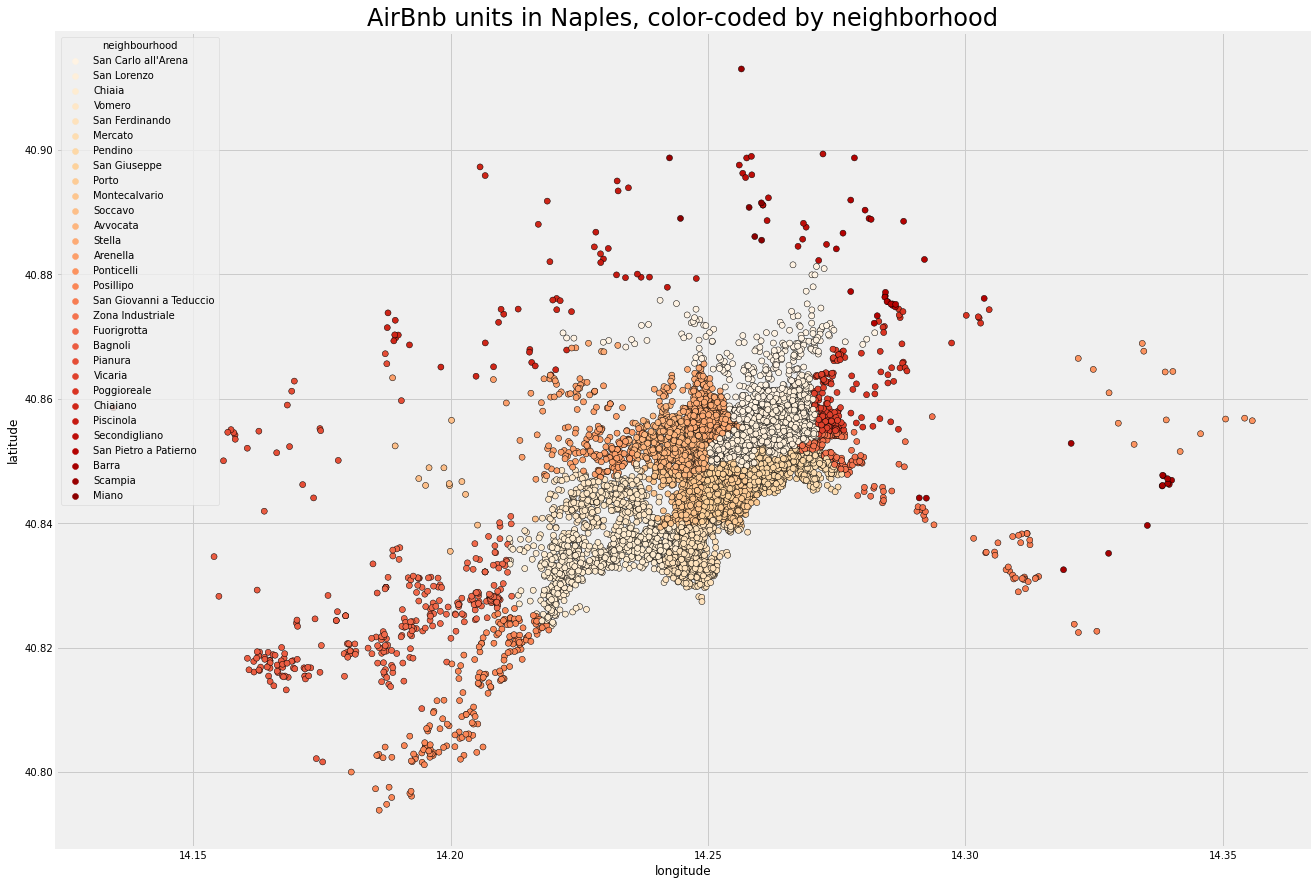

In [11]:
title = 'AirBnb units in Naples, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_naples_unique.longitude, master_df_naples_unique.latitude, hue = master_df_naples_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_naples.png')
plt.show()

## Add review data through a join

In [12]:
df_reviews = pd.concat([naples_raw_df_10_6_2021,raw_df_naples],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,30466,Naturists rooms in the heart of city,14169118,Gigi,NaN,San Carlo all'Arena,40.857590,14.259430,Private room,41,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1,7,0
1,30536,cosy room to let in naples,14169118,Gigi,NaN,San Lorenzo,40.855430,14.258120,Private room,41,...,4.80,4.67,4.80,4.73,4.33,4.47,f,1,7,0
2,63413,Charming Room on Riviera di Chiaia,309483,Paola,NaN,Chiaia,40.833190,14.226130,Entire home/apt,50,...,4.84,4.54,4.96,4.88,4.69,4.76,t,1,0,0
3,74364,Cozy place in a princely Palace inside Old Town,289412,Davide,NaN,San Lorenzo,40.851200,14.252170,Entire home/apt,50,...,4.91,4.92,4.96,4.96,4.83,4.89,t,8,0,0
4,76993,"Central Cebollitas B&B, spacious private ensuite.",411650,Cebollitas,NaN,Vomero,40.845680,14.226180,Private room,33,...,5.00,5.00,4.92,5.00,4.92,5.00,t,1,3,0
5,77009,"Central Cebollitas B&B Napoli,single/double room",411650,Cebollitas,NaN,Vomero,40.845680,14.226180,Private room,25,...,4.88,4.92,4.92,4.94,4.86,4.83,t,1,3,0
6,77010,"central Cebollitas B&B , large single/double",411650,Cebollitas,NaN,Vomero,40.845680,14.226180,Private room,25,...,4.89,4.89,4.88,4.93,4.85,4.85,t,1,3,0
7,107336,Panoramic Penthouse:Terrace wi-fi,556066,Maria,NaN,San Ferdinando,40.839920,14.246130,Entire home/apt,30,...,4.84,4.83,4.87,4.89,4.70,4.79,f,1,0,0
8,112346,Matrimonial room Hotel Zara Naples,573482,Hotel Zara,NaN,San Lorenzo,40.854000,14.269130,Hotel room,40,...,4.12,3.94,4.41,4.06,3.24,3.94,t,0,1,0
9,137587,Napoli Cardinal’s house Duomo centro storico,672635,Alessandro,NaN,San Lorenzo,40.853610,14.258440,Entire home/apt,59,...,5.00,5.00,4.96,4.96,4.92,4.84,f,1,0,0


## Regression

In [13]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -52.77400670118695
Coefficients:  [  7.00419733  31.77444797  -2.90927799  -0.05172617   2.25257238
   6.85716752  16.42724162  11.57825842 -20.35096868]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
2715,390,54.881475,-335.118525
3438,400,65.893100,-334.106900
784,387,67.078742,-319.921258
5997,380,62.983822,-317.016178
561,380,69.627642,-310.372358


<function matplotlib.pyplot.ylim(*args, **kwargs)>

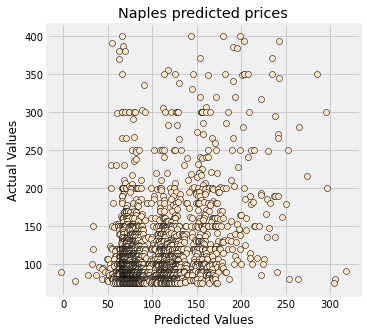

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naples predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim